In [1]:
# Adding library dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sqlalchemy import create_engine

In [ ]:
# use sql alchemy / pandas methods (maybe read_sql)
# from OpenWeather_AQI_DB_Final import pollutants_data_table_df, AQI_table_df

In [2]:
# Store CSV into DataFrame
# Read in data and display first 5 rows
AQI_data = pd.read_csv('Resources/AQI_data.csv')
AQI_data.head(5)

,Date,State,Latitude,Longitude,AQI,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3,dt
0,2020-11-27 05:00:00,AK,63.588753,-154.493062,1,195.27,0.0,0.03,54.36,0.06,0.5,0.54,0.0,1606453200
1,2020-11-27 06:00:00,AK,63.588753,-154.493062,1,196.93,0.0,0.03,56.51,0.06,0.5,0.54,0.0,1606456800
2,2020-11-27 07:00:00,AK,63.588753,-154.493062,1,198.60,0.0,0.03,57.94,0.07,0.5,0.54,0.0,1606460400
3,2020-11-27 08:00:00,AK,63.588753,-154.493062,1,198.60,0.0,0.03,58.65,0.07,0.5,0.54,0.0,1606464000
4,2020-11-27 09:00:00,AK,63.588753,-154.493062,1,198.60,0.0,0.03,58.65,0.07,0.5,0.54,0.0,1606467600


In [3]:
print(AQI_data.shape)

(26560, 14)


In [4]:
# Descriptive statistics for each column
#All cells are full, verifying there aren't gaps/missing values to clean/remove associated values
AQI_copy = AQI_data
# Labels are the values we want to predict
labels = AQI_data['AQI']
# Features are the values we want to evaluate in reference to the output label
features = AQI_data.drop(['Date', 'AQI', 'State','Latitude', 'Longitude', 'dt'], axis=1)

In [5]:
# Using Skicit-learn to split data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=1)
# test_size = 0.25 or another test size could be added if needed

In [6]:
# Evaluating the output of the training split
features_train

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
19538,250.34,0.05,0.98,147.34,0.90,27.67,29.04,1.54
21960,247.00,0.00,3.51,83.69,0.49,1.56,2.01,0.64
19630,393.87,0.14,1.30,130.18,1.43,55.22,64.18,4.81
14724,247.00,0.00,4.28,41.49,0.04,1.49,2.28,1.82
13708,213.62,0.02,4.84,45.06,0.17,2.68,4.11,0.82
...,...,...,...,...,...,...,...,...
10955,347.14,0.29,24.68,89.41,5.25,18.59,20.53,1.44
17289,191.93,0.00,3.04,68.67,0.32,8.09,10.19,2.47
5192,150.20,0.00,0.14,77.96,0.02,0.50,0.54,0.00
12172,257.02,0.41,4.07,118.73,4.35,8.37,8.93,0.22


In [7]:
 # Evaluating the output of the testing split
features_test

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
8652,427.25,0.16,35.64,25.75,9.54,11.50,12.74,0.90
23863,213.62,0.44,2.64,62.94,0.68,1.69,2.11,0.36
2257,220.30,0.00,0.93,63.66,0.15,0.50,0.50,0.02
12587,423.91,0.37,31.19,74.39,5.31,6.66,7.68,1.63
12339,283.72,0.44,3.60,124.45,3.10,5.21,6.07,0.57
...,...,...,...,...,...,...,...,...
24195,191.93,0.00,2.01,82.25,0.50,0.88,1.72,0.09
25369,247.00,0.00,10.03,23.60,1.76,4.85,5.55,0.09
7759,340.46,5.98,21.42,54.36,16.69,19.62,22.32,0.38
17506,190.26,0.00,2.36,47.92,0.20,2.37,3.45,2.41


In [8]:
# Scaling features so that varying data ranges can be comparable 
scaler = StandardScaler().fit(features_train)
features_train_scaled = scaler.transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 600 decision trees
rclf = RandomForestClassifier(n_estimators = 600, random_state = 7)
# Train the model on training data
rclf.fit(features_train_scaled, labels_train)


print(f'Training Score: {rclf.score(features_train_scaled, labels_train)}')
print(f'Testing Score: {rclf.score(features_test_scaled, labels_test)}')

Training Score: 1.0
Testing Score: 0.9996987951807229


In [11]:
# Use the forest's predict method on the test data
predictions = rclf.predict(features_test)
# Calculate the absolute errors
errors = abs(predictions - labels_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 3.01 degrees.


In [12]:
# Calculate mean absolute percentage error (MAPE)
mape = (errors / labels_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 97.46 %.


In [13]:
# Evaluating impact importance of the different features (i.e. pollutants relavance on the AQI)
feature_importances = rclf.feature_importances_
results = sorted(zip(features.columns, rclf.feature_importances_), key = lambda x: x[1])
results

[('NH3', 0.019230926950276037),
 ('NO', 0.028174127006549667),
 ('CO', 0.03102901636446812),
 ('SO2', 0.040378552486780545),
 ('NO2', 0.044957510629605686),
 ('PM10', 0.14686302450271146),
 ('PM2_5', 0.22440296294725717),
 ('O3', 0.4649638791123513)]

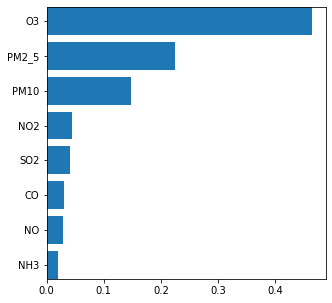

In [14]:
# The goal here is to make a visualization with plotly showing the importance of the pollutants on the AQI score

cols = [r[0] for r in results]
width = [r[1] for r in results]

fig, ax = plt.subplots()

fig.set_size_inches(5,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [ ]:
## Considering another classifier model

# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X_train_features), y_train_labels, random_state=1)
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train_scaled = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

# rclf = LogisticRegression().fit(X_train_features, y_train)
# print(f'Training Score: {rclf.score(X_train_features, y_train_labels)}')
# print(f'Testing Score: {rclf.score(X_test_features, y_test_labels)}')

In [ ]:
#query using different fileters from databases

In [ ]:
## Considering AdaBoost CLassifier

# from sklearn.ensemble import AdaBoostClassifier
#   from sklearn.datasets import make_classification
#   X, y = make_classification(n_samples=1000, n_features=4,
# ...                            n_informative=2, n_redundant=0,
# ...                            random_state=0, shuffle=False)
#   clf = AdaBoostClassifier(n_estimators=100, random_state=0)
#   clf.fit(X, y)
# AdaBoostClassifier(n_estimators=100, random_state=0)
#   clf.predict([[0, 0, 0, 0]])
# array([1])
#   clf.score(X, y)
# 0.983...

In [ ]:
# class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]¶

In [ ]:
## import numpy as np
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)
#Pipeline(steps=[('standardscaler', StandardScaler()),
#                ('svc', SVC(gamma='auto'))])

In [1]:
! pip install xgboost

In [3]:
conda install xgboost

Solving environment: done

## Package Plan ##

  environment location: /Users/michelle/opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    xgboost-1.3.3              |   py38hecd8cb5_0          23 KB
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/osx-64::libxgboost-1.3.3-h23ab428_0
  py-xgboost         pkgs/main/osx-64::py-xgboost-1.3.3-py38hecd8cb5_0
  xgboost            pkgs/main/osx-64::xgboost-1.3.3-py38hecd8cb5_0




In [4]:
# check xgboost version? Cofused by this error, unable to try associated classifier model - see sample below
import xgboost
print(xgboost.__version__)

1.3.3


In [ ]:
# # test classification dataset
# from sklearn.datasets import make_classification
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# # summarize the dataset
# print(X.shape, y.shape)

In [5]:
# make predictions using xgboost for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

# make predictions using xgboost for classification
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
model = XGBClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]
row = asarray([row])
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

/Users/michelle/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predicted Class: 1
[19:52:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predicted Class: 1
